In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import f1_score, log_loss, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
import joblib

In [7]:
# Import training and testing sets
X_train = pd.read_csv("/home/s2106664/msc_project/training_testing_dataset/X_train.csv")
X_validate = pd.read_csv("/home/s2106664/msc_project/training_testing_dataset/X_validate.csv")
X_test = pd.read_csv("/home/s2106664/msc_project/training_testing_dataset/X_test.csv")
y_train = pd.read_csv("/home/s2106664/msc_project/training_testing_dataset/y_train.csv").squeeze()
y_validate = pd.read_csv("/home/s2106664/msc_project/training_testing_dataset/y_validate.csv").squeeze()
y_test = pd.read_csv("/home/s2106664/msc_project/training_testing_dataset/y_test.csv").squeeze()

# 1. Hyperparameter tuning using training set cross validation

In [3]:
# features to scale and not to scale
scaled_features = ["hypermutation_rate", "cdr3_length", "Factor_I", "Factor_II",
                   "Factor_III", "Factor_IV", "Factor_V", "np1_length", "np2_length"]

non_scaled_features = X_train.columns.drop(scaled_features)

scaling = ColumnTransformer(transformers=[("scaler", StandardScaler(), scaled_features),
                                          ("passthrough", "passthrough", non_scaled_features)])

pipe = Pipeline([("scaler", scaling),
                 ("sgd", SGDClassifier(loss="log_loss", random_state=42))])


## 1.1 Hyperparameter searching using Gridsearch for l1 and l2 regularisation

In [19]:
param_1 = {
    "sgd__penalty": ["l1", "l2"],
    "sgd__alpha": [0.0001, 0.001, 0.01, 0.1]
}

grid_search_1 = GridSearchCV(
    estimator=pipe,
    param_grid=param_1,
    cv=5,
    scoring="accuracy",
    n_jobs=50,
    verbose=2
)

grid_search_1.fit(X_train, y_train)

joblib.dump(grid_search_1, 'grid_search_1_results_SGD.pkl')

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END .................sgd__alpha=0.0001, sgd__penalty=l2; total time=  31.5s
[CV] END ....................sgd__alpha=0.1, sgd__penalty=l2; total time=  34.3s
[CV] END ....................sgd__alpha=0.1, sgd__penalty=l2; total time=  34.9s
[CV] END ....................sgd__alpha=0.1, sgd__penalty=l2; total time=  36.4s
[CV] END ...................sgd__alpha=0.01, sgd__penalty=l2; total time=  39.4s
[CV] END .................sgd__alpha=0.0001, sgd__penalty=l2; total time=  39.5s
[CV] END ..................sgd__alpha=0.001, sgd__penalty=l2; total time=  40.8s
[CV] END .................sgd__alpha=0.0001, sgd__penalty=l1; total time=  41.0s
[CV] END ...................sgd__alpha=0.01, sgd__penalty=l1; total time=  41.2s
[CV] END ...................sgd__alpha=0.01, sgd__penalty=l2; total time=  41.8s
[CV] END ..................sgd__alpha=0.001, sgd__penalty=l2; total time=  43.0s
[CV] END .................sgd__alpha=0.0001, sgd_

['grid_search_1_results_SGD.pkl']

In [11]:
grid_search_1 = joblib.load("/home/s2106664/msc_project/model_training/logistic_regression/grid_search_1_results_SGD.pkl")

In [7]:
grid_search_1.

{'sgd__penalty': ['l1', 'l2'], 'sgd__alpha': [0.0001, 0.001, 0.01, 0.1]}

In [5]:
best_param_1 = grid_search_1.best_params_
best_score_1 = grid_search_1.best_score_
print(f"The best parameter for gridsearch_1 is {best_param_1} with the accuracy of {best_score_1}")

The best parameter for gridsearch_1 is {'sgd__alpha': 0.0001, 'sgd__penalty': 'l2'} with the accuracy of 0.5596200210806144


In [21]:
grid_search_1_result = pd.DataFrame(grid_search_1.cv_results_)
grid_search_1_result.to_csv("grid_search_1_results_SGD.csv", index=False)


In [22]:
grid_search_1_result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_sgd__alpha,param_sgd__penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,44.103357,2.522430,0.537805,0.036565,0.0001,l1,"{'sgd__alpha': 0.0001, 'sgd__penalty': 'l1'}",0.558998,0.559332,0.558531,0.559332,0.558620,0.558962,3.398222e-04,3
1,41.205726,5.733686,0.548114,0.044341,0.0001,l2,"{'sgd__alpha': 0.0001, 'sgd__penalty': 'l2'}",0.559778,0.560129,0.559104,0.559915,0.559175,0.559620,4.087739e-04,1
2,50.249494,3.783437,0.574374,0.041144,0.0010,l1,"{'sgd__alpha': 0.001, 'sgd__penalty': 'l1'}",0.553525,0.553315,0.553407,0.553531,0.553318,0.553419,9.498957e-05,5
3,42.862837,1.540261,0.585941,0.077051,0.0010,l2,"{'sgd__alpha': 0.001, 'sgd__penalty': 'l2'}",0.559095,0.559830,0.558701,0.559225,0.558745,0.559119,4.080958e-04,2
4,46.841322,3.750157,0.520464,0.044316,0.0100,l1,"{'sgd__alpha': 0.01, 'sgd__penalty': 'l1'}",0.547965,0.547965,0.547964,0.547964,0.547964,0.547965,1.518719e-07,7
5,44.319260,3.607757,0.529259,0.019158,0.0100,l2,"{'sgd__alpha': 0.01, 'sgd__penalty': 'l2'}",0.555651,0.556014,0.555610,0.555619,0.555832,0.555745,1.566775e-04,4
6,54.411283,2.333760,0.555348,0.048436,0.1000,l1,"{'sgd__alpha': 0.1, 'sgd__penalty': 'l1'}",0.547965,0.547965,0.547964,0.547964,0.547964,0.547965,1.518719e-07,7
7,40.208899,6.860899,0.522735,0.027950,0.1000,l2,"{'sgd__alpha': 0.1, 'sgd__penalty': 'l2'}",0.548939,0.548744,0.548922,0.548866,0.548856,0.548865,6.853996e-05,6


## 1.2 Hyperparameter searching using Gridsearch for elasticnet regularisation

In [21]:
param_2 = {
    "sgd__penalty": ["elasticnet"],
    "sgd__l1_ratio": [0.1, 0.5, 0.9],
    "sgd__alpha": [0.0001, 0.001, 0.01, 0.1]
}

grid_search_2 = GridSearchCV(
    estimator=pipe,
    param_grid=param_2,
    cv=5,
    scoring="accuracy",
    n_jobs=50,
    verbose=2,
    refit=False
)

grid_search_2.fit(X_train, y_train)

joblib.dump(grid_search_2, 'grid_search_2_results_SGD.pkl')

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END sgd__alpha=0.0001, sgd__l1_ratio=0.5, sgd__penalty=elasticnet; total time=  43.4s
[CV] END sgd__alpha=0.01, sgd__l1_ratio=0.1, sgd__penalty=elasticnet; total time=  44.0s
[CV] END sgd__alpha=0.0001, sgd__l1_ratio=0.9, sgd__penalty=elasticnet; total time=  44.4s
[CV] END sgd__alpha=0.0001, sgd__l1_ratio=0.1, sgd__penalty=elasticnet; total time=  44.8s
[CV] END sgd__alpha=0.0001, sgd__l1_ratio=0.1, sgd__penalty=elasticnet; total time=  48.2s
[CV] END sgd__alpha=0.01, sgd__l1_ratio=0.1, sgd__penalty=elasticnet; total time=  51.8s
[CV] END sgd__alpha=0.0001, sgd__l1_ratio=0.9, sgd__penalty=elasticnet; total time=  54.8s
[CV] END sgd__alpha=0.001, sgd__l1_ratio=0.5, sgd__penalty=elasticnet; total time=  56.6s
[CV] END sgd__alpha=0.01, sgd__l1_ratio=0.1, sgd__penalty=elasticnet; total time=  57.1s
[CV] END sgd__alpha=0.01, sgd__l1_ratio=0.9, sgd__penalty=elasticnet; total time=  55.6s
[CV] END sgd__alpha=0.01, sgd__l1_rati

['grid_search_2_results_SGD.pkl']

In [23]:
grid_search_2 = joblib.load("/home/s2106664/msc_project/model_training/logistic_regression/grid_search_2_results_SGD.pkl")

In [24]:
best_param_2 = grid_search_2.best_params_
best_score_2 = grid_search_2.best_score_
print(f"The best parameter for gridsearch_2 is {best_param_2} with the accuracy of {best_score_2}")

The best parameter for gridsearch_2 is {'sgd__alpha': 0.0001, 'sgd__l1_ratio': 0.1, 'sgd__penalty': 'elasticnet'} with the accuracy of 0.5596139860142918


In [24]:
grid_search_2_result = pd.DataFrame(grid_search_2.cv_results_)
grid_search_2_result.to_csv("grid_search_2_results_SGD.csv", index=False)

In [25]:
grid_search_2_result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_sgd__alpha,param_sgd__l1_ratio,param_sgd__penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,60.005193,13.419494,0.871985,0.306227,0.0001,0.1,elasticnet,"{'sgd__alpha': 0.0001, 'sgd__l1_ratio': 0.1, '...",0.559678,0.560208,0.559111,0.559887,0.559186,0.559614,4.166593e-04,1
1,62.150844,11.507212,0.715989,0.148591,0.0001,0.5,elasticnet,"{'sgd__alpha': 0.0001, 'sgd__l1_ratio': 0.5, '...",0.559428,0.559936,0.558904,0.559716,0.558987,0.559394,4.012110e-04,2
2,58.874833,9.879299,0.695821,0.185789,0.0001,0.9,elasticnet,"{'sgd__alpha': 0.0001, 'sgd__l1_ratio': 0.9, '...",0.559094,0.559497,0.558611,0.559361,0.558768,0.559066,3.375928e-04,3
3,68.407839,9.691531,0.983687,0.455611,0.0010,0.1,elasticnet,"{'sgd__alpha': 0.001, 'sgd__l1_ratio': 0.1, 's...",0.558217,0.558730,0.558027,0.558270,0.557830,0.558215,3.007254e-04,4
4,70.830786,9.454788,0.597176,0.055868,0.0010,0.5,elasticnet,"{'sgd__alpha': 0.001, 'sgd__l1_ratio': 0.5, 's...",0.555293,0.555842,0.555205,0.555110,0.555597,0.555409,2.708667e-04,5
5,70.231511,6.975203,0.868408,0.504815,0.0010,0.9,elasticnet,"{'sgd__alpha': 0.001, 'sgd__l1_ratio': 0.9, 's...",0.553771,0.554066,0.553648,0.553994,0.553600,0.553816,1.850574e-04,6
6,61.515943,14.718325,0.814857,0.335684,0.0100,0.1,elasticnet,"{'sgd__alpha': 0.01, 'sgd__l1_ratio': 0.1, 'sg...",0.551674,0.551726,0.551762,0.551795,0.551390,0.551669,1.454290e-04,7
7,70.751013,7.196084,0.862378,0.302905,0.0100,0.5,elasticnet,"{'sgd__alpha': 0.01, 'sgd__l1_ratio': 0.5, 'sg...",0.547965,0.547965,0.547964,0.547964,0.547964,0.547965,1.518719e-07,8
8,59.359089,6.878099,2.274810,3.147811,0.0100,0.9,elasticnet,"{'sgd__alpha': 0.01, 'sgd__l1_ratio': 0.9, 'sg...",0.547965,0.547965,0.547964,0.547964,0.547964,0.547965,1.518719e-07,8
9,73.541468,5.655771,0.666728,0.059817,0.1000,0.1,elasticnet,"{'sgd__alpha': 0.1, 'sgd__l1_ratio': 0.1, 'sgd...",0.547965,0.547965,0.547964,0.547964,0.547964,0.547965,1.518719e-07,8


In [25]:
print(f"The best model in GridSearch_1 gives the accuracy of {best_score_1} under the parameter {best_param_1}")
print(f"The best model in GridSearch_2 gives the accuracy of {best_score_2} under the parameter {best_param_2}")

if best_score_1 > best_score_2:
    print(f"The model with parameter {best_param_1} is better")
    best_param = best_param_1.copy()
elif best_score_1 == best_score_2:
    print("Both models gives the same score")
    best_param = best_score_1.copy()
else:
    print(f"The model with parameter {best_param_2} is better")
    best_param = best_param_2.copy()

The best model in GridSearch_1 gives the accuracy of 0.5596200210806144 under the parameter {'sgd__alpha': 0.0001, 'sgd__penalty': 'l2'}
The best model in GridSearch_2 gives the accuracy of 0.5596139860142918 under the parameter {'sgd__alpha': 0.0001, 'sgd__l1_ratio': 0.1, 'sgd__penalty': 'elasticnet'}
The model with parameter {'sgd__alpha': 0.0001, 'sgd__penalty': 'l2'} is better


# 2. Model training using complete datasets

In [8]:
scaler = StandardScaler()

X_train_scaled = X_train.copy()
X_train_scaled[scaled_features] = scaler.fit_transform(X_train_scaled[scaled_features])

X_validate_scaled = X_validate.copy()
X_validate_scaled[scaled_features] = scaler.transform(X_validate[scaled_features])

X_test_scaled = X_test.copy()
X_test_scaled[scaled_features] = scaler.transform(X_test[scaled_features])

## 2.1 Training model with early stopping using patience = 10

In [100]:
sgd_model = SGDClassifier(loss="log_loss",
                          penalty="l2",
                          alpha=0.0001,
                          n_jobs=50,
                          verbose=2,
                          random_state=42,
                          max_iter=1,
                          tol=None,
                          warm_start=True)

train_losses = []
val_losses = []

classes = np.unique(y_train)
max_epochs = 100
patience = 5
best_val_loss = np.inf
epochs_without_improvement = 0

for epoch in range(max_epochs):
    sgd_model.partial_fit(X_train_scaled, y_train, classes=classes)

    # Training predictions and metrics
    train_probs = sgd_model.predict_proba(X_train_scaled)
    train_loss = log_loss(y_train, train_probs)

    train_losses.append(train_loss)

    # Validation predictions and metrics
    val_probs = sgd_model.predict_proba(X_validate_scaled)
    val_loss = log_loss(y_validate, val_probs)

    val_losses.append(val_loss)

    print(f"Epoch {epoch+1}: Train Loss={train_loss:.4f}, Val Loss={val_loss:.4f}")

    if val_loss < best_val_loss - 1e-5:
        best_val_loss = val_loss
        best_model = sgd_model
        epochs_without_improvement = 0
    else:
        epochs_without_improvement += 1
        if epochs_without_improvement >= patience:
            print(f"Early stopping triggered at epoch {epoch+1}")
            break

# Dump the result into pkl format
joblib.dump(best_model, 'logistic_regression_model_SGD.pkl')

-- Epoch 1
Norm: 1.64, NNZs: 75, Bias: -0.159398, T: 7290722, Avg. loss: 0.696034
Total training time: 1.84 seconds.
Epoch 1: Train Loss=0.6798, Val Loss=0.6798
-- Epoch 1
Norm: 1.64, NNZs: 75, Bias: -0.155286, T: 7290722, Avg. loss: 0.679676
Total training time: 1.85 seconds.
Epoch 2: Train Loss=0.6796, Val Loss=0.6796
-- Epoch 1
Norm: 1.64, NNZs: 75, Bias: -0.152291, T: 7290722, Avg. loss: 0.679386
Total training time: 1.83 seconds.
Epoch 3: Train Loss=0.6794, Val Loss=0.6794
-- Epoch 1
Norm: 1.65, NNZs: 75, Bias: -0.150045, T: 7290722, Avg. loss: 0.679267
Total training time: 1.84 seconds.
Epoch 4: Train Loss=0.6793, Val Loss=0.6793
-- Epoch 1
Norm: 1.65, NNZs: 75, Bias: -0.148339, T: 7290722, Avg. loss: 0.679202
Total training time: 1.84 seconds.
Epoch 5: Train Loss=0.6792, Val Loss=0.6792
-- Epoch 1
Norm: 1.65, NNZs: 75, Bias: -0.147031, T: 7290722, Avg. loss: 0.679161
Total training time: 1.84 seconds.
Epoch 6: Train Loss=0.6792, Val Loss=0.6792
-- Epoch 1
Norm: 1.65, NNZs: 75, B

['logistic_regression_model_SGD.pkl']

In [103]:
training_log = pd.DataFrame({
    "epoch": list(range(1, len(train_losses) + 1)),
    "train_loss": train_losses,
    "val_loss": val_losses,
})

training_log.to_csv("training_log.csv", index=False)

In [4]:
logistic_regression_model = joblib.load("/home/s2106664/msc_project/model_training/logistic_regression/logistic_regression_model_SGD.pkl")

## 2.2 Validation on training, validation, and test set

In [9]:
y_pred_train = logistic_regression_model.predict(X_train_scaled)
f1_train = f1_score(y_train, y_pred_train)
accuracy_train = accuracy_score(y_train, y_pred_train)

In [10]:
accuracy_train, f1_train

(0.5597623939028261, 0.36648035342013563)

In [11]:
y_pred_validate = logistic_regression_model.predict(X_validate_scaled)
f1_validate = f1_score(y_validate, y_pred_validate)
accuracy_validate = accuracy_score(y_validate, y_pred_validate)

In [12]:
accuracy_validate, f1_validate

(0.5593872758794742, 0.36513748703549115)

In [108]:
y_pred_test = logistic_regression_model.predict(X_test_scaled)
f1_test = f1_score(y_test, y_pred_test)
accuracy_test = accuracy_score(y_test, y_pred_test)

In [109]:
accuracy_test, f1_test

(0.5597860734895062, 0.3670573535003258)

## 2.3 Plotting train-loss curve

In [13]:
training_log = pd.read_csv("/home/s2106664/msc_project/model_training/logistic_regression/training_log.csv")

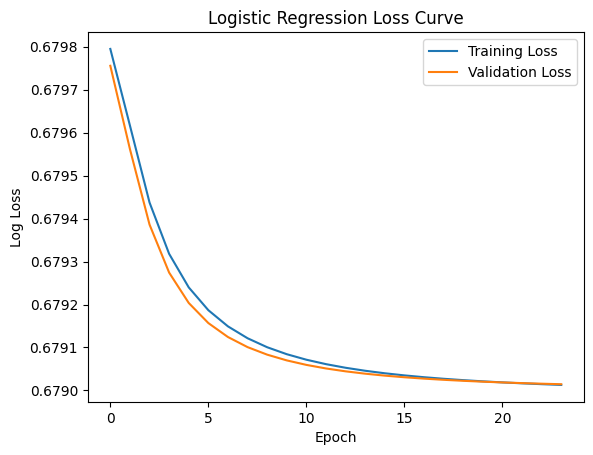

In [15]:
plt.plot(training_log["train_loss"], label="Training Loss")
plt.plot(training_log["val_loss"], label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Log Loss")
plt.title("Logistic Regression Loss Curve")
plt.legend()
plt.savefig("logistic_training_loss.png", dpi=300, bbox_inches='tight')
plt.show()

## 2.4 Plotting confusion matrix

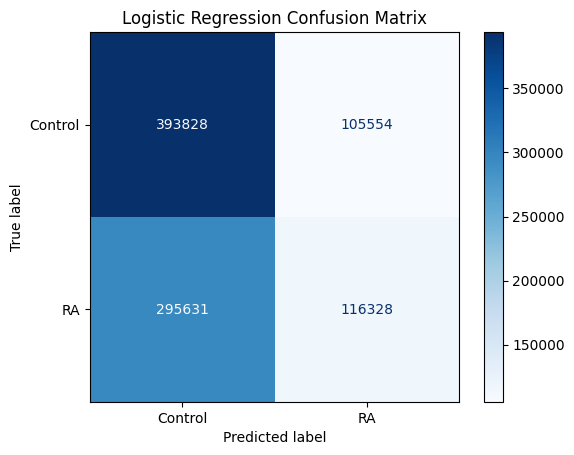

In [40]:
predicted = logistic_regression_model.predict(X_test_scaled)
cm = confusion_matrix(y_test, predicted)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Control", "RA"])
disp.plot(cmap=plt.cm.Blues, values_format=".0f")
plt.title("Logistic Regression Confusion Matrix")
plt.savefig("logistic_confusion_matrix.png", dpi=300, bbox_inches='tight')
plt.show()

In [17]:
cm

array([[393828, 105554],
       [295631, 116328]])

## 2.5 Plotting ROC curve

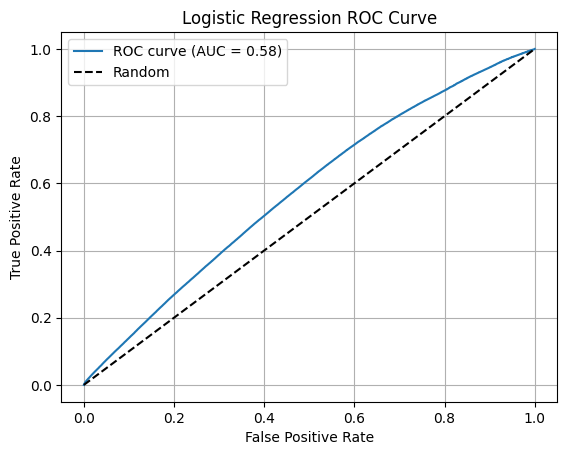

Probabilities (first 10): [0.42211771 0.52683443 0.38450497 0.49508559 0.4220836  0.37792981
 0.44557926 0.44965815 0.40442843 0.41085861]
True labels (first 10): 0    0
1    0
2    0
3    0
4    0
5    0
6    1
7    1
8    1
9    1
Name: disease_status, dtype: int64


In [42]:
y_prob = logistic_regression_model.predict_proba(X_test_scaled)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], "k--", label="Random")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistic Regression ROC Curve")
plt.legend()
plt.grid()
plt.savefig("logistic_roc_curve.png", dpi=300, bbox_inches='tight')
plt.show()

print("Probabilities (first 10):", y_prob[:10])
print("True labels (first 10):", y_test[:10])